## 2. IMPORTING LIBRARIES 

In [129]:
# importing all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

%matplotlib inline


In [130]:
#list all files in my directory
!ls

README.md
REAL ESTATE.ipynb
data


## 3. READING DATA

In [176]:
#Importing data from kc_house_data.csv
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [177]:
#Importing data from column_names.md
column_names = pd.read_csv('data/column_names.md', on_bad_lines='skip')
column_names

,# Column Names and Descriptions for King County Data Set
0,* `id` - Unique identifier for a house
1,* `date` - Date house was sold
2,* `price` - Sale price (prediction target)
3,* `bedrooms` - Number of bedrooms
4,* `bathrooms` - Number of bathrooms
5,* `sqft_living` - Square footage of living spa...
6,* `sqft_lot` - Square footage of the lot
7,* `floors` - Number of floors (levels) in house
8,* `waterfront` - Whether the house is on a wat...
9,* `view` - Quality of view from house


In [178]:
print(column_names.to_string())

                                                                                                            # Column Names and Descriptions for King County Data Set
0                                                                                                                             * `id` - Unique identifier for a house
1                                                                                                                                     * `date` - Date house was sold
2                                                                                                                         * `price` - Sale price (prediction target)
3                                                                                                                                  * `bedrooms` - Number of bedrooms
4                                                                                                                                * `bathrooms` - Number of bathrooms
5         

## 4. DATA PREPARATION

### 4.1 Checking Data Types and Converting to Appropriate

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### 4.1.1 Changing the date data type

In [180]:
#Converting date into datetime object dtype
data['date'] = pd.to_datetime(data['date'])


#### 4.1.2 Changing sqft_basement datatype

In [181]:
#Converting the datatype and also replacing missing values with 0
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan).astype(float).fillna(0).astype(int)


### 4.2 Missing Values

Only three columns have null values(*waterfront, view & yr_renovated*). There are variuos ways to handle missing data. Let's look at individual columns one by one.

#### 4.2.1 'waterfront' Column

In [182]:
#Viewing data in the column
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [183]:
#Replacing the null values with 'NO' 
data['waterfront'].fillna('NO', inplace=True)


#### 4.2.2 'view' Column

In [184]:
data['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [185]:
data['view'].fillna('NONE', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int32         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

#### 4.2.3 'yr_renovated' Column

In [186]:
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

In [187]:
data['yr_renovated'].fillna(0.0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int32         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

We have replaced all missing values in our dataframe but we are going to confirm just to be sure

In [188]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 4.3 Encoding Categorical Variables

#### 4.3.1 'waterfront' Column

In [190]:
data['waterfront'].replace('YES', 1, inplace=True)
data['waterfront'].replace('NO', 0, inplace=True)
data['waterfront'].tail(20)

21577    0
21578    0
21579    0
21580    0
21581    0
21582    0
21583    0
21584    0
21585    0
21586    0
21587    0
21588    0
21589    0
21590    0
21591    0
21592    0
21593    0
21594    0
21595    0
21596    0
Name: waterfront, dtype: int64

### 4.3.2 'view' Column

In [191]:
data['view'].value_counts()

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [192]:
data['view'].replace('NONE', 0, inplace=True)
data['view'].replace('AVERAGE', 1, inplace=True)
data['view'].replace('GOOD', 2, inplace=True)
data['view'].replace('FAIR', 3, inplace=True)
data['view'].replace('EXCELLENT', 4, inplace=True)
data['view'].tail(20)

21577    1
21578    0
21579    0
21580    0
21581    0
21582    1
21583    0
21584    0
21585    0
21586    0
21587    0
21588    0
21589    0
21590    0
21591    0
21592    0
21593    0
21594    0
21595    0
21596    0
Name: view, dtype: int64

### 4.3.3 'condition' Column

In [193]:
data['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [194]:
data['condition'].replace('Poor', 0, inplace=True)
data['condition'].replace('Fair', 1, inplace=True)
data['condition'].replace('Average', 2, inplace=True)
data['condition'].replace('Good', 3, inplace=True)
data['condition'].replace('Very Good', 4, inplace=True)
data['condition'].head()

0    2
1    2
2    2
3    4
4    2
Name: condition, dtype: int64

### 4.3.4 'grade' Column

In [195]:
data['grade'].value_counts()

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

In [196]:
data['grade_levels'] = data['grade'].str.extract('(\d+)').astype('int')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_levels
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,8


### 4.4 Check Duplicates

In [197]:
data.duplicated().sum()

0

### 4.5 Check Outliers

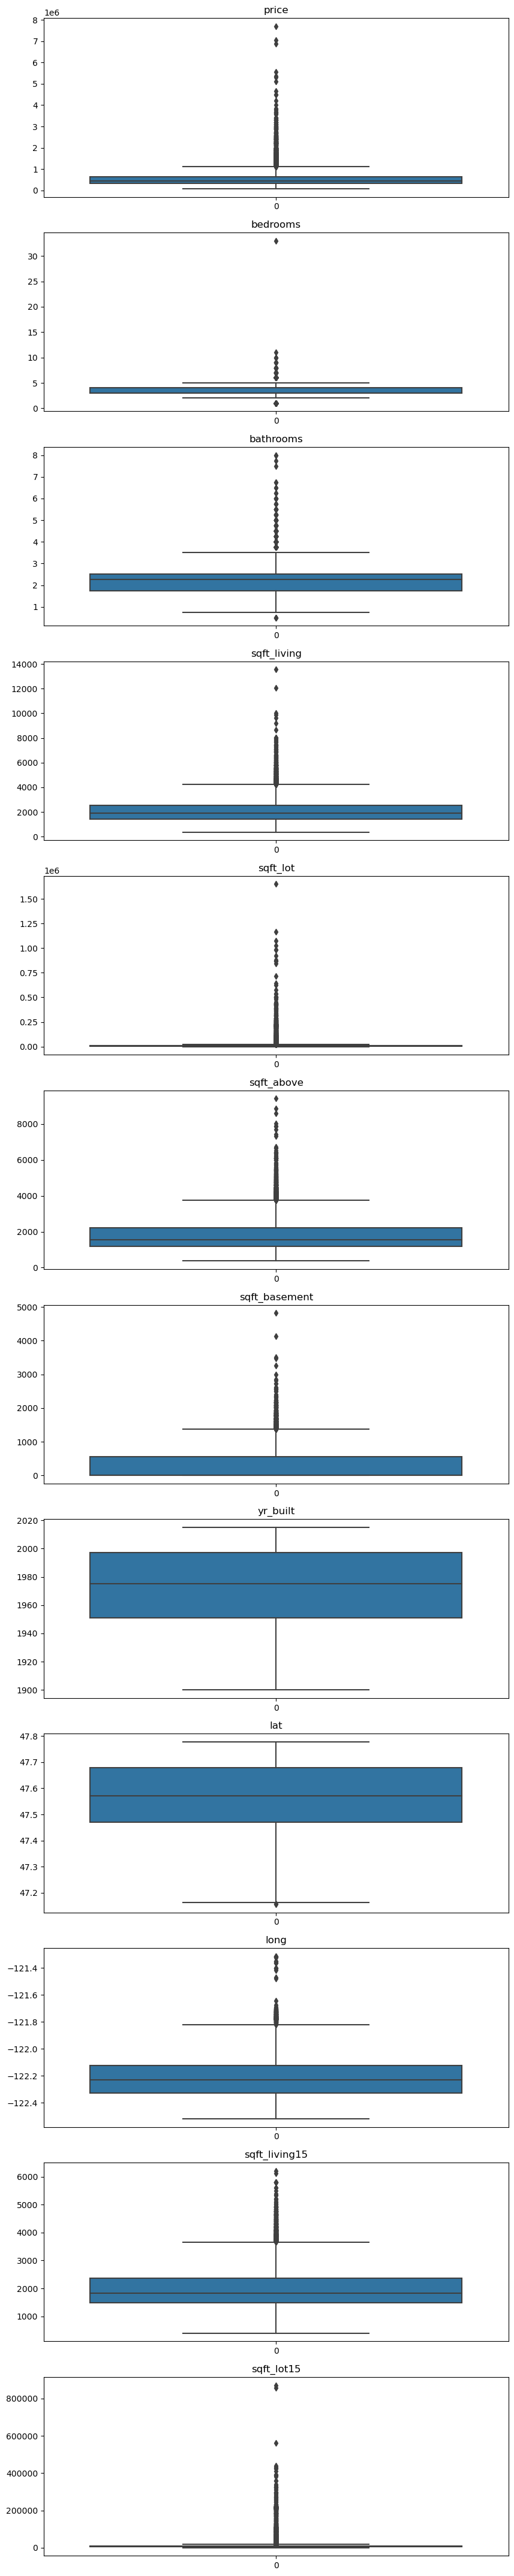

In [198]:
#Creating a function to plot boxplots for all columns except 'id' column
def boxplts(df, column_to_ignore):
    df_1 = df.copy()
    columns_to_plot = df_1.drop(column_to_ignore, axis=1).columns
    fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10,55))
    for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis)
        axis.set_title(column)
    plt.show()

boxplts(data, ['id', 'date', 'grade','zipcode', 'grade_levels', 'yr_renovated', 'waterfront', 'condition', 'view', 'floors'])


In [199]:
data['bathrooms'].value_counts()

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [200]:
def all_valcounts(df):
    for column in df.columns:
        print("{} column name-".format(column))
        print(df[column].value_counts())
        print("-"*30)

all_valcounts(data)

id column name-
id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64
------------------------------
date column name-
date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: count, Length: 372, dtype: int64
------------------------------
price column name-
price
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: count, Length: 3622, dtype: int64
------------------------------
bedrooms column name-
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: c

The data from using both the boxplot method and vieiwng the value_counts method one can see inconsistence in the data and also see that the data has outliers.
- Bedrooms has a figure of 33 bedrooms which we can choose to ignore or take action against it.(maybe delete the row)
- id has also been repeated which can mean either the rows are repeated or there is another explanation to it.

- Investigating the 33 bedrooms occurence.

In [201]:
#Investigating the 33 bedrooms row 
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_levels
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700,7


- We are going to delete it as a house cant have 33 bedrooms and 1.75 bathrooms. It doesnt make sense.

In [202]:
data.drop(index=15856, inplace=True)

- Investigating the id repetition occurence

In [203]:
repeated_id = data[data.duplicated(subset=['id'], keep=False)]
repeated_id

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_levels
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500,8
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500,8
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0,2,...,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244,11
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,2,...,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244,11
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,960,280,1922,1984.0,98146,47.4957,-122.352,1820,7460,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,2680,0,2013,0.0,98045,47.4759,-121.734,2680,5992,8
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598,7
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598,7
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,2780,0,2013,0.0,98065,47.5184,-121.886,2850,6000,9


- The id is a unique identfier of houses. We can say its safe to assume the houses were sold numerous times in the period. As they have same features.

## 5. EXPLORATORY DATA ANALYSIS

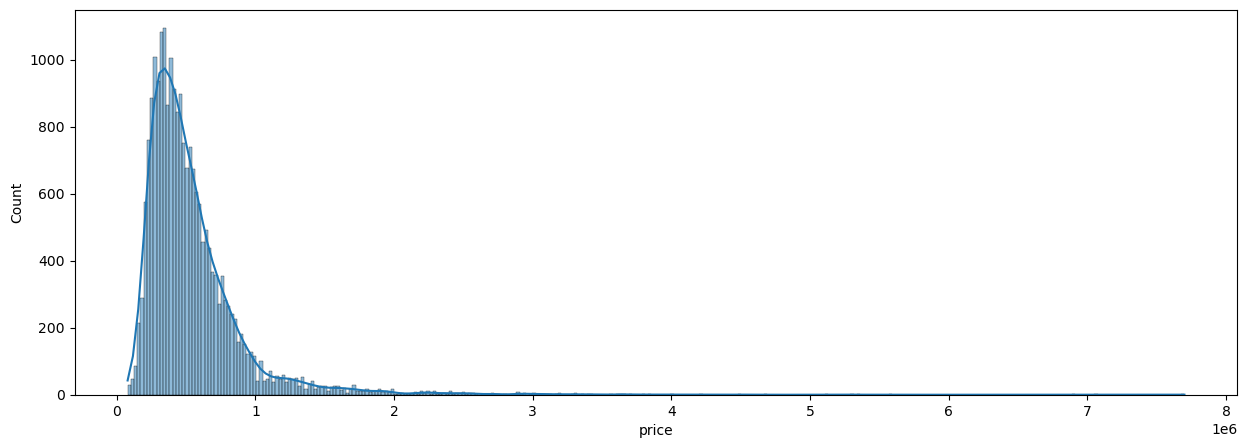

In [204]:
plt.figure(figsize=(15,5))


sns.histplot(data['price'], kde=True)
plt.show()

- The distribution of the dependent variable is positively skewed. This can lead to heteroscedasticity which means that the variance of the residuals is not consatnt across all levels of the independent variable. This can lead to biased estimates of the regression coefficients and incorrect standard errors. It can also lead to non-normality of the residuals.

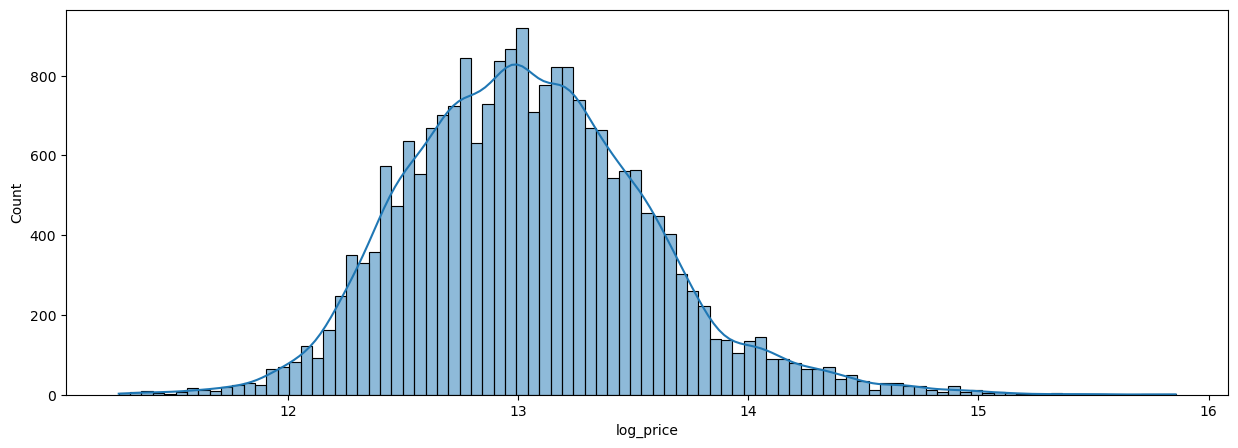

In [205]:

data['log_price'] = np.log(data['price'])
plt.figure(figsize=(15,5))
sns.histplot(data['log_price'], kde=True)
plt.show()

- We transformed our dependent variable to get a normal distribution.

### Distribution of other Variables

In [206]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_levels',
       'log_price'],
      dtype='object')

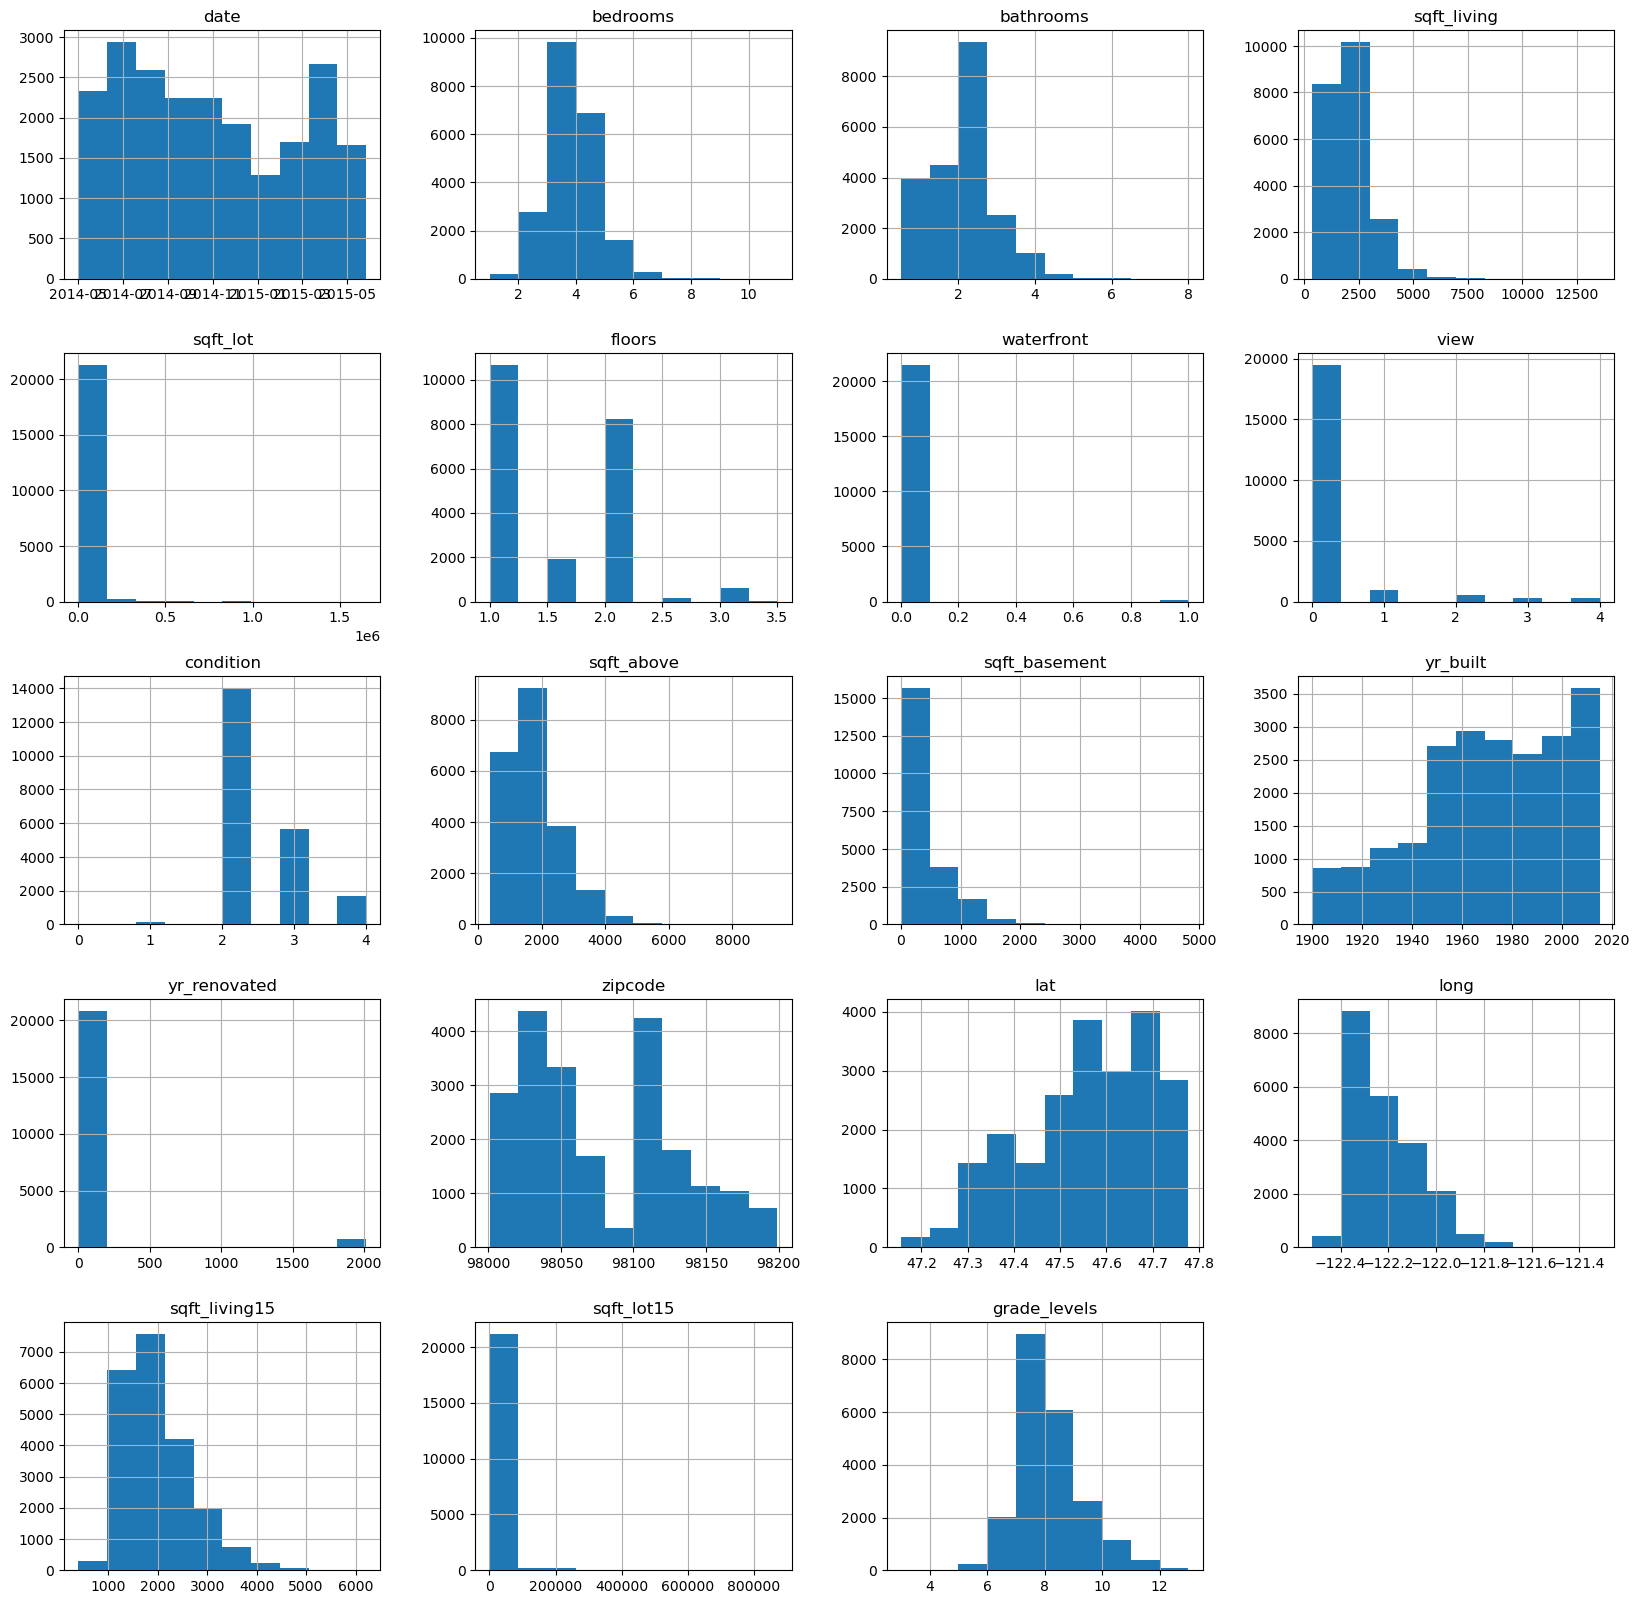

In [207]:
other_var = data.drop(['id', 'price', 'grade', 'log_price'], axis=1)
other_var.hist(figsize=(20,20))
plt.show()

### Feature Engineering

- Creating a column which will describe the ages of the houses

In [208]:
data['age'] = 2015 - data['yr_built']
data['age']

0        60
1        64
2        82
3        50
4        28
         ..
21592     6
21593     1
21594     6
21595    11
21596     7
Name: age, Length: 21596, dtype: int64

- Create a new renovation column where if a house has been renovated it will be represented with '1' if not '0'

In [209]:
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data['renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovated, Length: 21596, dtype: int64

- Creating a new dataframe with columns we are going to need.


In [210]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_levels',
       'log_price', 'age', 'renovated'],
      dtype='object')

In [211]:
#Creating a new dataframe
dataset = data[['id', 'price', 'bedrooms', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'age', 'grade_levels', 'renovated']].copy()
dataset

,id,price,bedrooms,floors,condition,sqft_above,sqft_basement,sqft_living,sqft_lot,age,grade_levels,renovated
0,7129300520,221900.0,3,1.0,2,1180,0,1180,5650,60,7,0
1,6414100192,538000.0,3,2.0,2,2170,400,2570,7242,64,7,1
2,5631500400,180000.0,2,1.0,2,770,0,770,10000,82,6,0
3,2487200875,604000.0,4,1.0,4,1050,910,1960,5000,50,7,0
4,1954400510,510000.0,3,1.0,2,1680,0,1680,8080,28,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,3.0,2,1530,0,1530,1131,6,8,0
21593,6600060120,400000.0,4,2.0,2,2310,0,2310,5813,1,8,0
21594,1523300141,402101.0,2,2.0,2,1020,0,1020,1350,6,7,0
21595,291310100,400000.0,3,2.0,2,1600,0,1600,2388,11,8,0


#### PLotting all columns against price to view if the relationship is linear

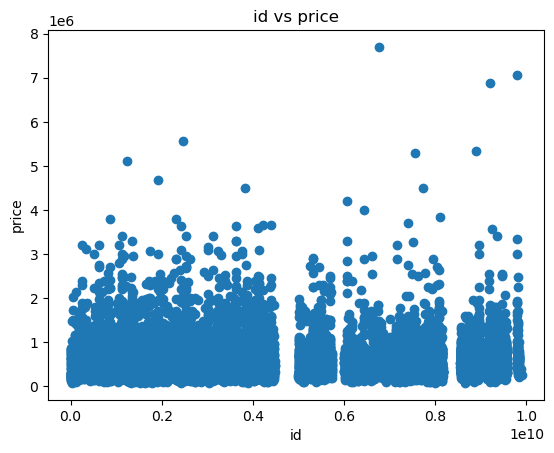

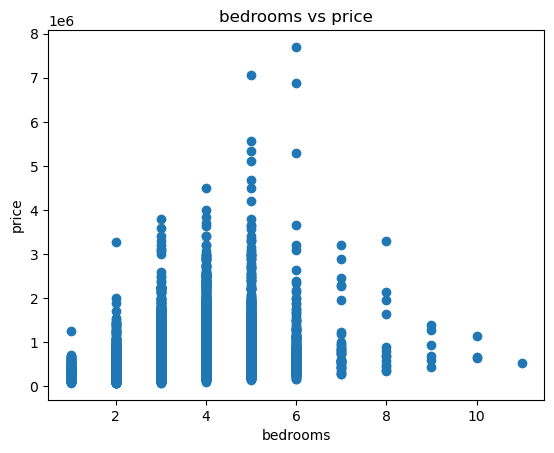

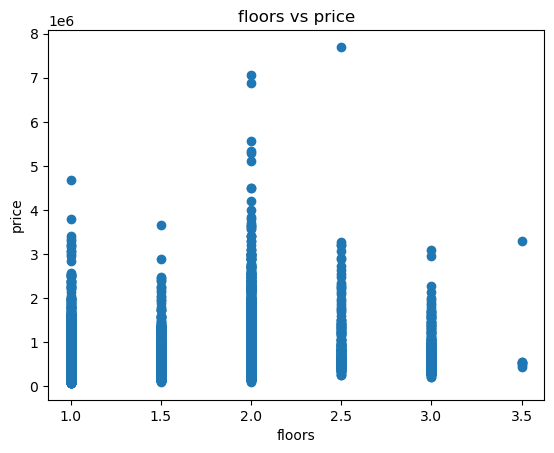

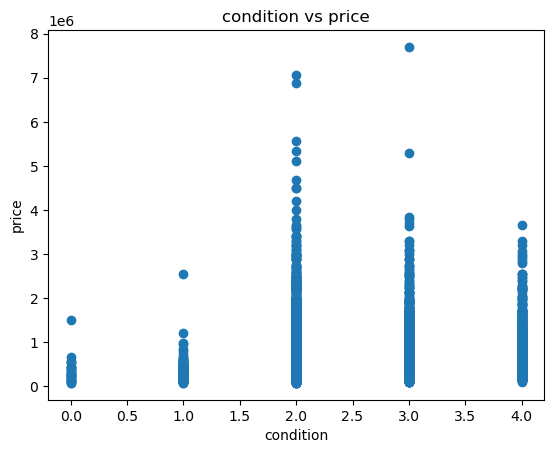

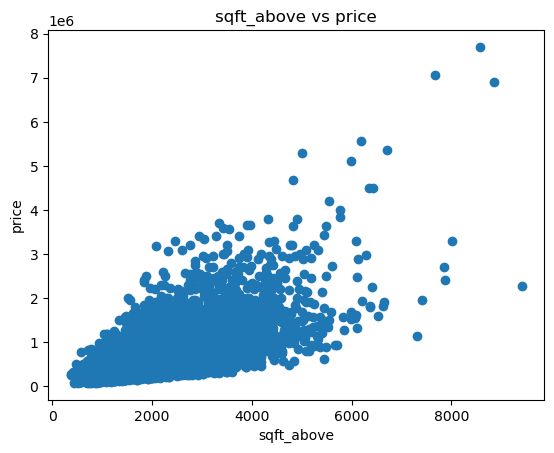

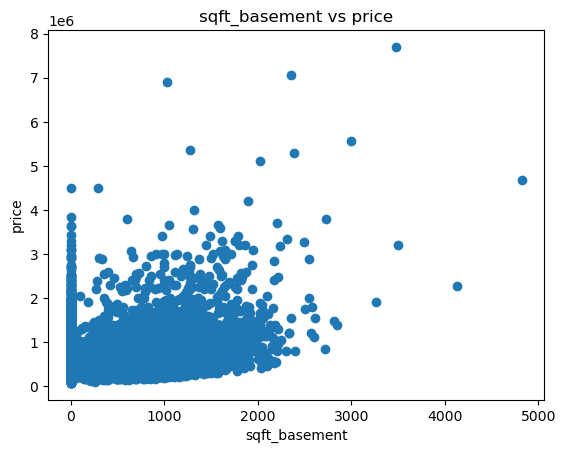

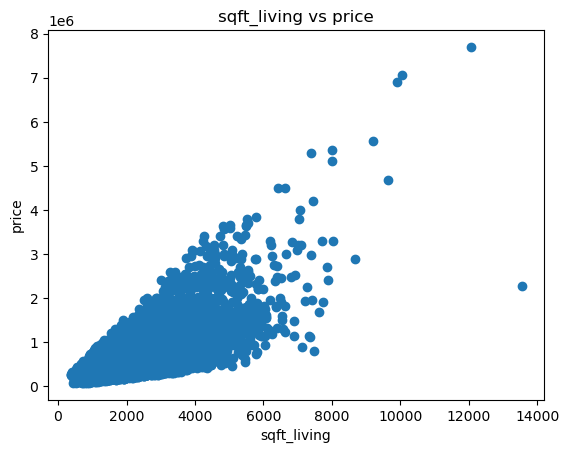

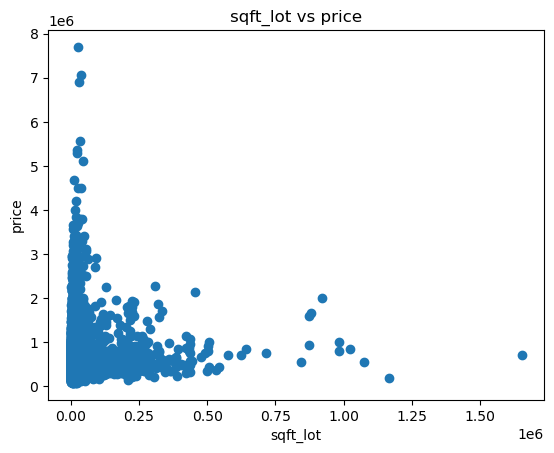

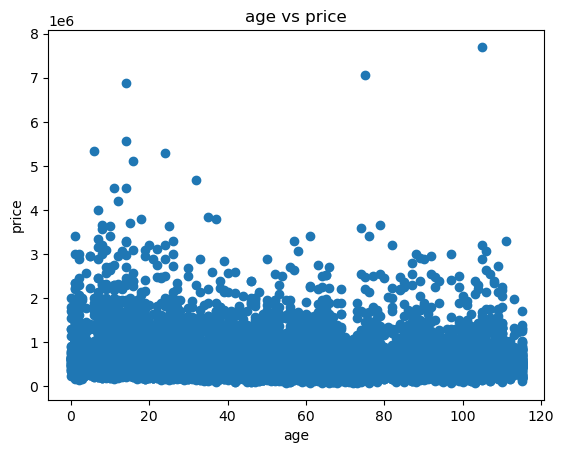

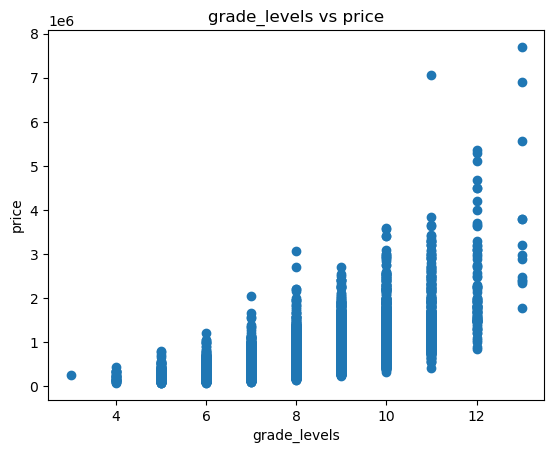

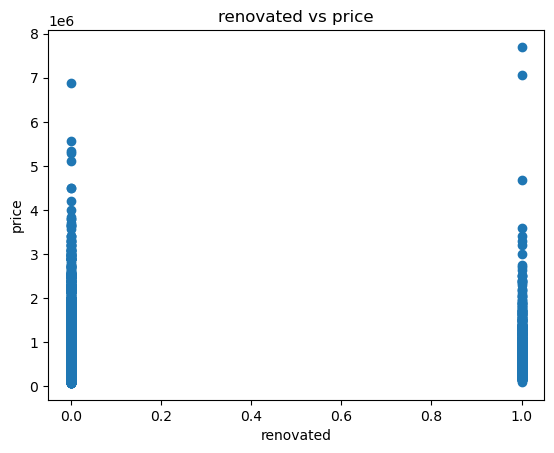

In [212]:
#Creating a function to plot the scatter plots
def scater_plts(df, yy):
    for col in df.columns:
        if col != yy:
            plt.scatter(df[col], df[yy])
            plt.xlabel(col)
            plt.ylabel(yy)
            plt.title(f"{col} vs {yy}")
            plt.show()

scater_plts(dataset, 'price')

- From the scatter plots plotted only a few show a linear relationship.
    - sqft_living
    - sqft_above
    - sqft_basement

### Multicollinearity

We are going to do a collinearity check to see if we have any variable with a perfect relationship which can lead to unstable estimates of regression coefficients.

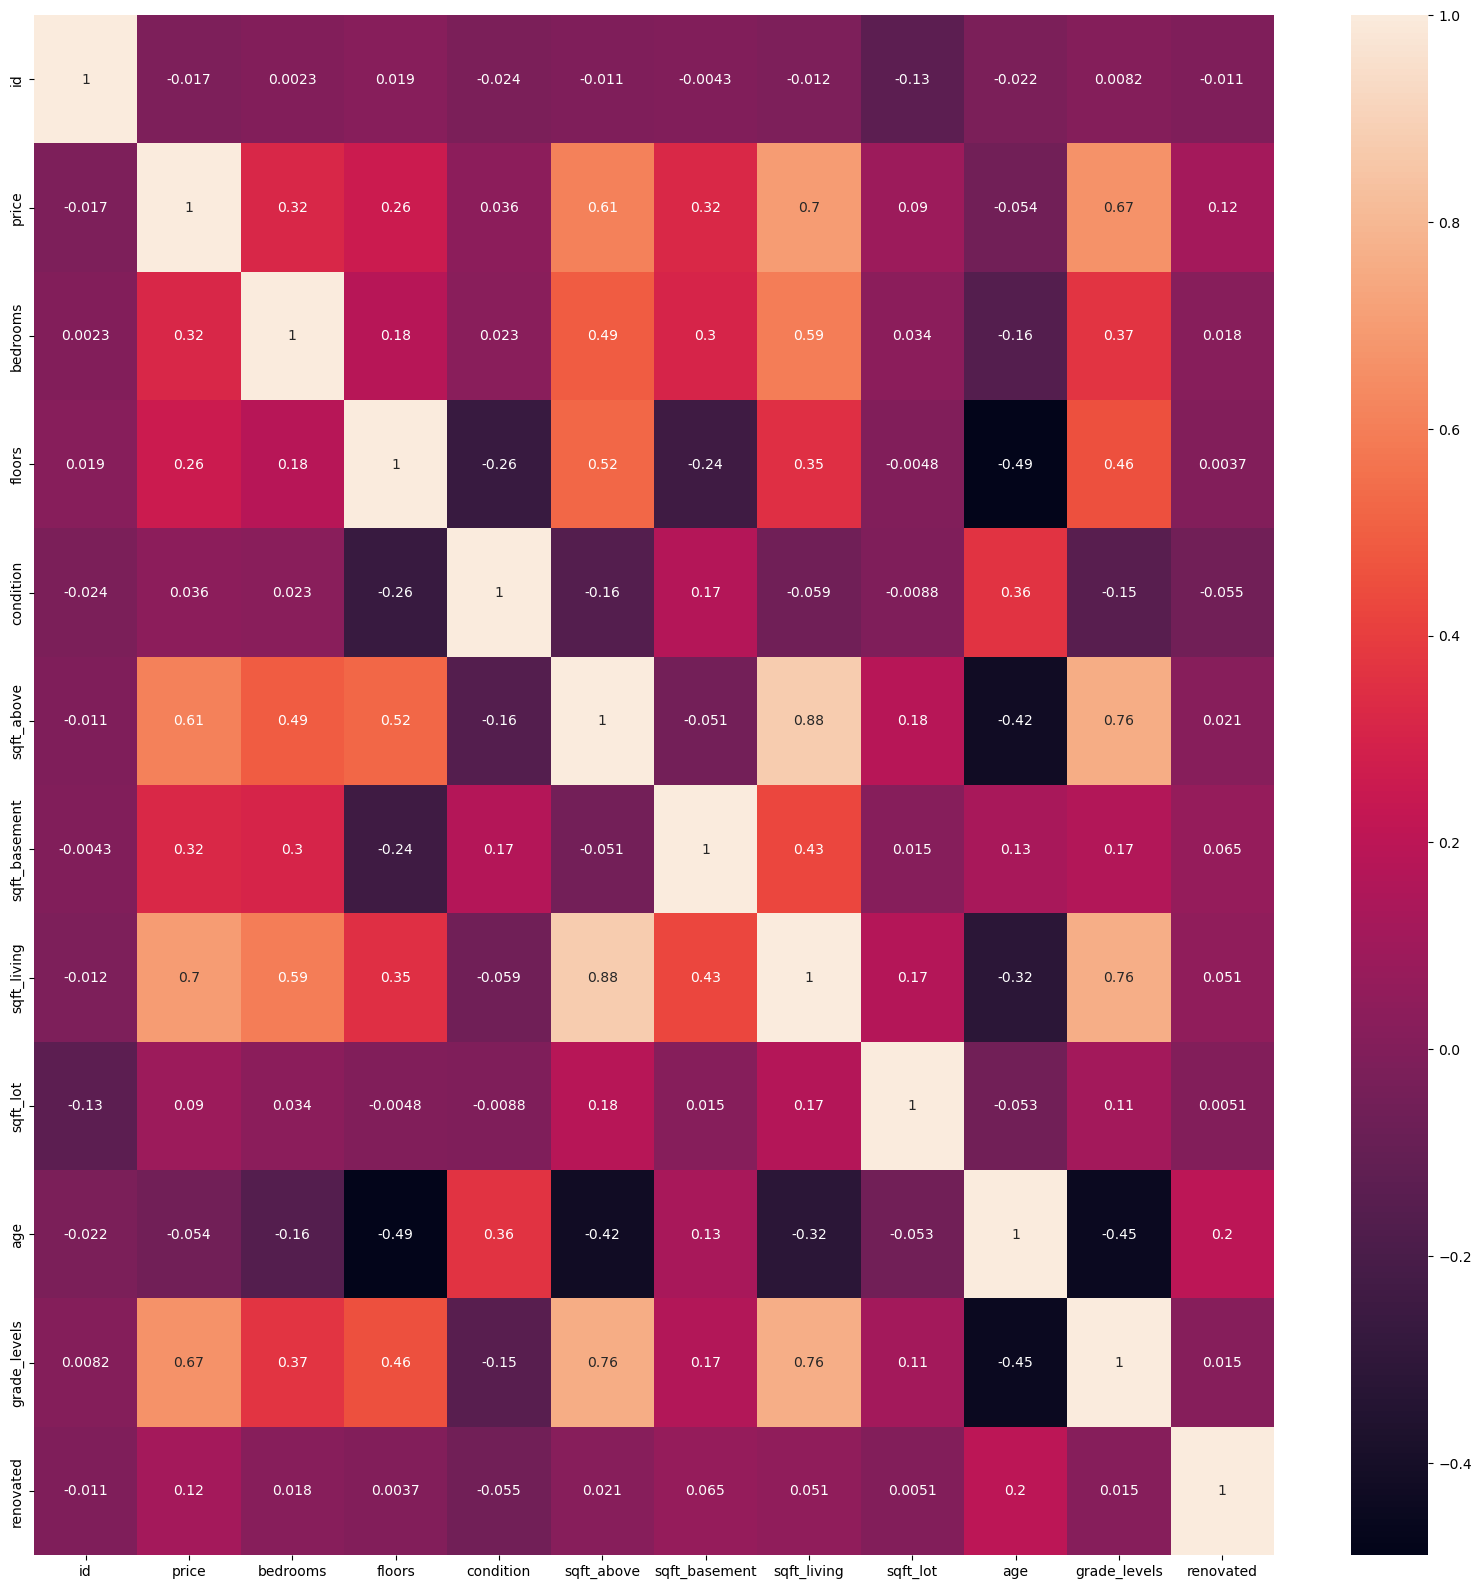

In [213]:
corelation_matrix = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corelation_matrix, annot=True)
plt.show()

- There is no variable with a perfect linear relationship.